# **Course Code : ICE477**
# **Name : MD. ARAFAT HOSSAIN SIAM** 
# **ID : 2018-2-50-018**
# **Department of ECE**


# **Import Libraries**

In [ ]:
import pandas as pd
from google.colab import files
from IPython.display import Image
from pprint import pprint
import io
from IPython import display
import numpy as np
print('Import Complete')

Import Complete


# **Uploading Files**

In [ ]:
uploaded = files.upload()
# Converting csv files into pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df.head()


Saving iris.csv to iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Load Data**

In [ ]:
# One hot encoding
species_one_hot = pd.get_dummies(df.species)
df = df.join(species_one_hot)
df = df.drop(['species'], axis = 1)
df.loc[[1,51,101]]

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
1,4.9,3.0,1.4,0.2,1,0,0
51,6.4,3.2,4.5,1.5,0,1,0
101,5.8,2.7,5.1,1.9,0,0,1


# **Output of One Neuron**

Saving artificial_neuron.PNG to artificial_neuron.PNG


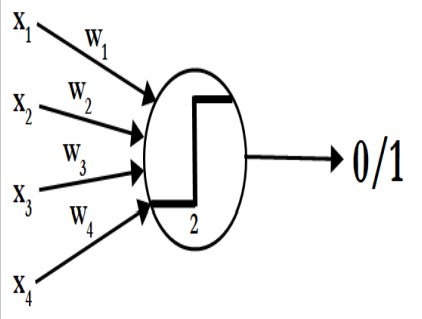

In [ ]:
uploaded  = files.upload()
display.Image("artificial_neuron.PNG")

In [ ]:
inputs = [4.9, 3.0, 1.4, 0.2]
weights = [0.9, 0.8, -1.0, -1.0]

In [ ]:
def weighted_sum(inputs, weights) :
    total = 0
    for input_value,weight in zip(inputs,weights) :
        total += input_value*weight
        
    return total

In [ ]:
def step_function(number) :
    if number>= 2 :
        return 1
    else : 
        return 0

In [ ]:
node_input = weighted_sum(inputs, weights)
print('Weighted sum is ',node_input)
node_output = step_function(node_input)
print('Output result is ',node_output)

Weighted sum is  5.21
Output result is  1


# **Output of the Neural Network**

Saving neural_net.PNG to neural_net.PNG


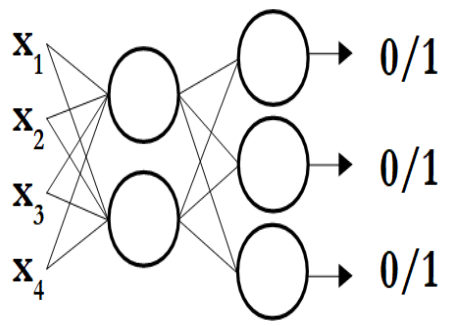

In [ ]:
uploaded = files.upload()
display.Image("neural_net.PNG")

In [ ]:
inputs = [[4.9, 3.0, 1.4, 0.2],
          [6.4, 3.2, 4.5, 1.5],
          [5.8, 2.7, 5.1, 1.9]]

weights_1 = [[0.9, 0.8, -1.0, -1.0],
             [-0.5, -0.5, 1.5, 1.0]]

weights_2 = [[2.0, -1.0],
             [1.0, 1.0],
             [-1.0, 2.0]]

In [ ]:
def determine_layer_outputs(list_of_inputs, list_of_weights, activation_function = True) :
  layer_outputs = []
  for inputs in list_of_inputs :
    node_outputs =[]
    for weights in list_of_weights :
      node_input = weighted_sum(inputs, weights)
      if activation_function :
        node_output = step_function(node_input)
      else :
        node_output = node_input
      node_outputs.append(node_output)

    layer_outputs.append(node_outputs)
    
  return layer_outputs

In [ ]:
hidden_layer_inputs = determine_layer_outputs(inputs, weights_1, activation_function = False)
pprint(hidden_layer_inputs)

print()

hidden_layer_outputs = determine_layer_outputs(inputs, weights_1)
pprint(hidden_layer_outputs, width = 10)

[[5.21, -1.6500000000000006],
 [2.3200000000000003, 3.4499999999999993],
 [0.38000000000000034, 5.299999999999999]]

[[1, 0],
 [1, 1],
 [0, 1]]


In [ ]:
output_layer_inputs = determine_layer_outputs(hidden_layer_outputs, weights_2, activation_function = False)
pprint(output_layer_inputs, width = 20)

print()

output_layer_outputs = determine_layer_outputs(hidden_layer_outputs, weights_2)
pprint(output_layer_outputs, width = 20)

[[2.0, 1.0, -1.0],
 [1.0, 2.0, 1.0],
 [-1.0, 1.0, 2.0]]

[[1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]


In [ ]:
df.loc[[1,51,101]]

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
1,4.9,3.0,1.4,0.2,1,0,0
51,6.4,3.2,4.5,1.5,0,1,0
101,5.8,2.7,5.1,1.9,0,0,1


# **Output of the Neural Network : Vectorized**

In [ ]:
inputs = np.array([[4.9, 3.0, 1.4, 0.2],
          [6.4, 3.2, 4.5, 1.5],
          [5.8, 2.7, 5.1, 1.9]])

weights_1 = np.array([[0.9, -0.5],
                      [0.8, -0.5],
                      [-1.0, 1.5],
                      [-1.0,1.0]])

weights_2 = np.array([[2 , 1, -1],
             [-1, 1, 2]])

In [ ]:
def step_function(array) :
  return (array>=2).astype(int)

In [ ]:
hidden_layer_inputs = np.dot(inputs, weights_1)
print(hidden_layer_inputs)

hidden_layer_outputs = step_function(hidden_layer_inputs)
hidden_layer_outputs

[[ 5.21 -1.65]
 [ 2.32  3.45]
 [ 0.38  5.3 ]]


array([[1, 0],
       [1, 1],
       [0, 1]])

In [ ]:
output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
print(output_layer_inputs)

output_layer_outputs = step_function(output_layer_inputs)
output_layer_outputs

[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]]


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

# **Non-Commutativity of Matrix Multiplication**

In [ ]:
np.random.seed(0)

A = np.random.randint(1, 10, size =(2, 2))
B = np.random.randint(1, 10, size =(2, 2))

In [ ]:
A

array([[6, 1],
       [4, 4]])

In [ ]:
B

array([[8, 4],
       [6, 3]])

In [ ]:
np.dot(A, B)

array([[54, 27],
       [56, 28]])

In [ ]:
np.dot(B, A)

array([[64, 24],
       [48, 18]])